In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#https://docs.opencv.org/trunk/d8/d83/tutorial_py_grabcut.html

#https://www.programcreek.com/python/example/89388/cv2.grabCut
#https://github.com/opencv/opencv/blob/master/samples/python/grabcut.py

In [3]:
src = cv.imread('/Users/kolsha/Pictures/lakes.png')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
pt1 = (0, 0)
pt2 = (0, 0)

# (295, 404, 484, 624) good

@interact(x1=(0, src.shape[1]), y1=(0, src.shape[0]),x2=(0, src.shape[1]), y2=(0, src.shape[0]) )
def rect_select(x1, y1, x2, y2):
    
    img = np.copy(src)
    global pt1, pt2
    pt1, pt2 = (x1, y1), (x2, y2)
    
    cv.rectangle(img, pt1, pt2, (0, 0, 255), 3)
    

        
    plt.imshow(img)
    plt.show()
    return (x1, y1, x2, y2)

interactive(children=(IntSlider(value=676, description='x1', max=1352), IntSlider(value=624, description='y1',…

(676, 624, 676, 624)


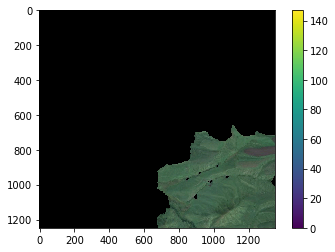

In [3]:
mask = np.zeros(src.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = pt1 + pt2

print(rect)

cv.grabCut(src, mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

img = np.copy(src)
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()
plt.show()

In [3]:
@interact_manual(img_set=['bike', 'nsu', 'lakes'], iters=(1, 15))
def mask_select(img_set, iters):
    
    img = cv.imread('/Users/kolsha/Documents/Projects/Python/sai_processing/grabCut/' + img_set + '.jpg')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    newmask = cv.imread('/Users/kolsha/Documents/Projects/Python/sai_processing/grabCut/' + img_set + '_mask.jpg',0)

    mask[newmask <= 1] = cv.GC_PR_BGD
    mask[newmask > 1] = cv.GC_PR_FGD | cv.GC_FGD
    
    mask = cv.blur(mask, (3, 3))
    
    print(img.shape, mask.shape)
    
    plt.figure(figsize = (20,20))
    plt.imshow(mask, aspect='auto')
    plt.title('Mask'), plt.xticks([]), plt.yticks([])
    
    mask2 = np.copy(mask)
    _, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel, iters,cv.GC_INIT_WITH_MASK)
    
    
    mask = np.where((mask==cv.GC_PR_FGD)|(mask==cv.GC_FGD)|(mask2==cv.GC_PR_FGD),1,0).astype('uint8')
    
    mask = cv.blur(mask, (3, 3))
    
    #print(mask2.shape, mask.shape)
    
    #mask = mask + mask2[mask2 == cv.GC_PR_FGD]
    
    plt.figure(figsize = (20,20))
    plt.imshow(mask, cmap = 'gray', aspect='auto')
    plt.title('Mask after'), plt.xticks([]), plt.yticks([])
    
    
    img_grubbed = np.copy(img)
    img_grubbed = img_grubbed * mask[:,:,np.newaxis]
    #plt.imshow(mask)
    plt.figure(figsize = (20,20))
    plt.imshow(img_grubbed, aspect='auto')
    plt.title('Result'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    
    plt.figure(figsize = (20,20))
    plt.imshow(img, aspect='auto')
    plt.title('Origin'), plt.xticks([]), plt.yticks([])
    plt.show()
    return (img_set)

interactive(children=(Dropdown(description='img_set', options=('bike', 'nsu', 'lakes'), value='bike'), IntSlid…